In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM


In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
# setting training dataset to 2nd column

training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1258, 1)

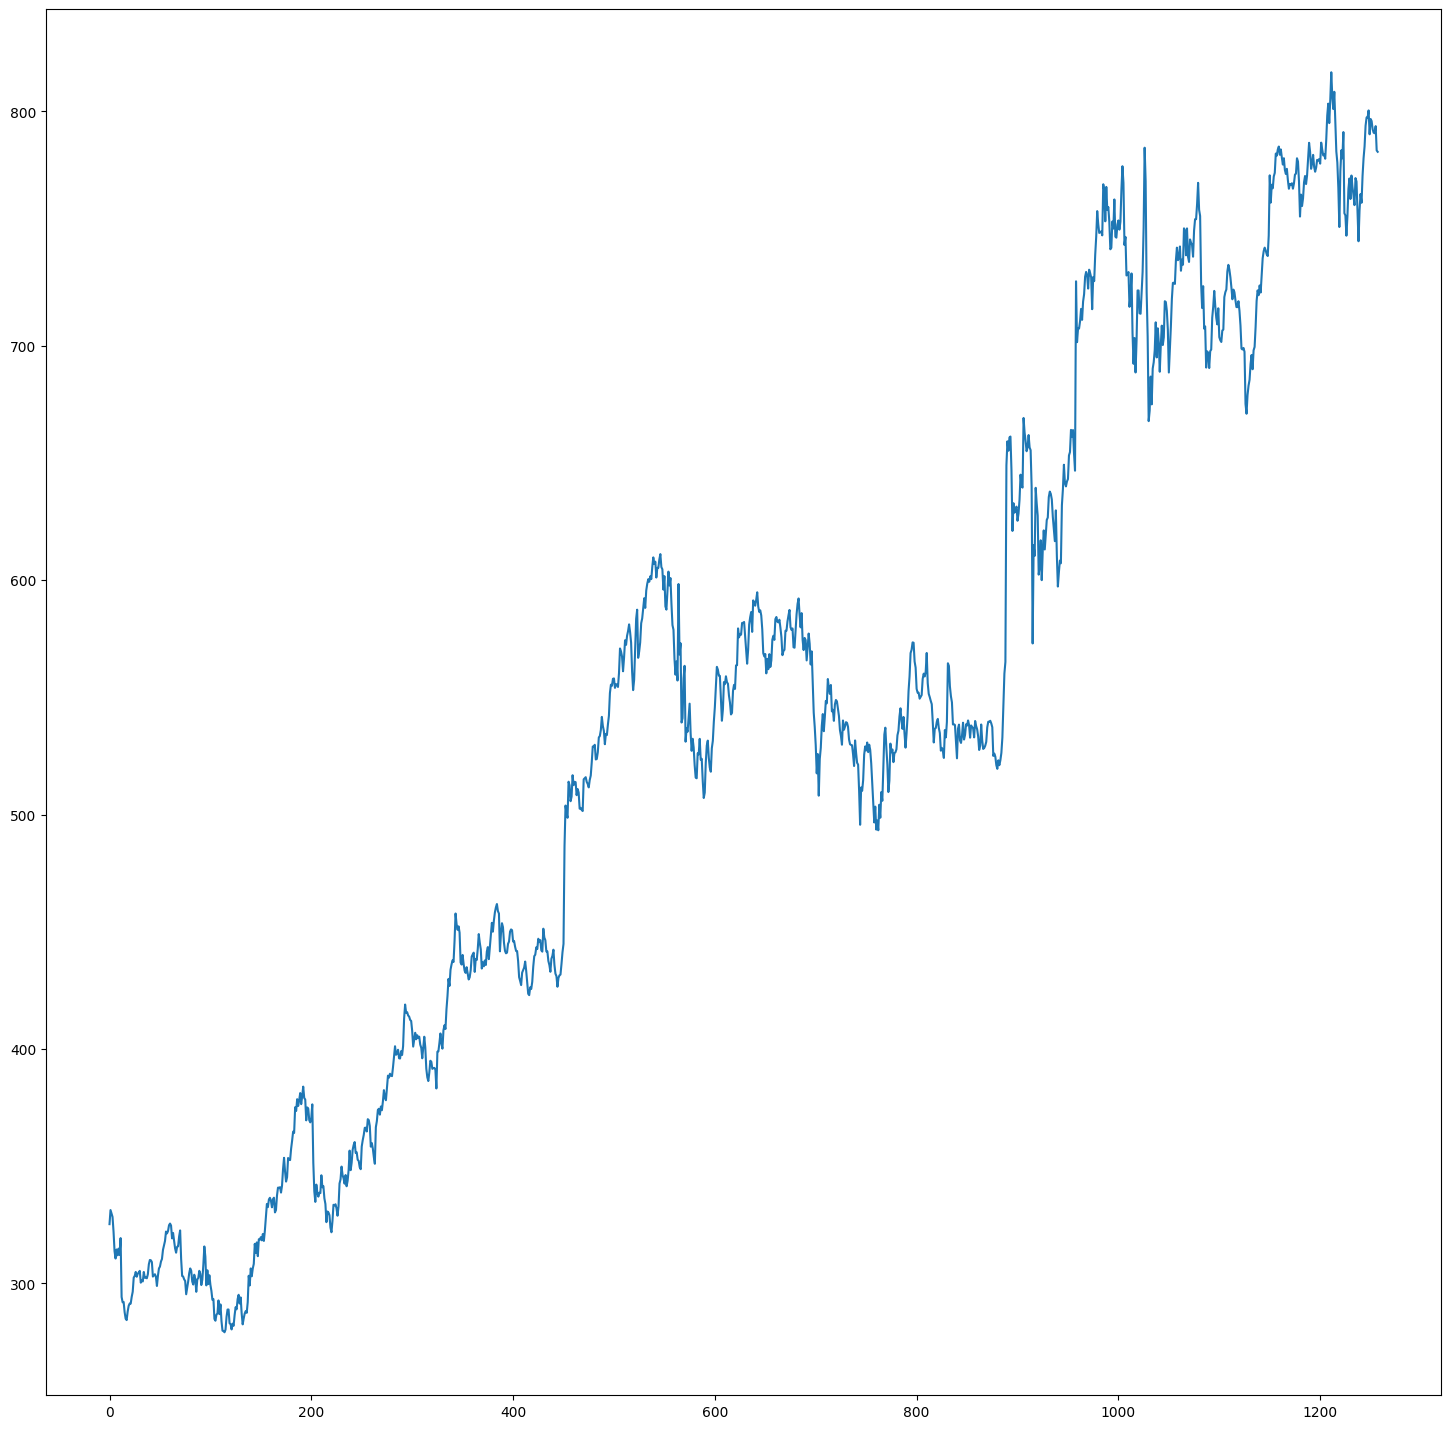

In [9]:
plt.figure(figsize=(18,18))
plt.plot(dataset_train["Open"])

In [12]:
sc = MinMaxScaler(feature_range=(0,1))

In [13]:
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

In [16]:
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

In [32]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, newshape =
 (X_train.shape[0], X_train.shape[1], 1))


In [38]:
# model 

regressor = Sequential()

In [40]:
# add 1st lstm layer
regressor.add(LSTM(units=50, return_sequences = True, 
                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate = 0.2))

In [42]:
# add 2nd lstm layer 

regressor.add(LSTM(units=50, return_sequences = True ))
regressor.add(Dropout(rate = 0.2))

In [43]:
# add 3rd lstm layer

regressor.add(LSTM(units=50, return_sequences = True, 
                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate = 0.2))

In [44]:
# add 4th lstm layer

regressor.add(LSTM(units=50, return_sequences = True, 
                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate = 0.2))

In [45]:
regressor.add(Dense(units=1))

In [47]:
regressor.compile(optimizer="adam", loss='mse')

In [ ]:
history = regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 77ms/step - loss: 0.1226
Epoch 2/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0876
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0830
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0817
Epoch 5/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0798
Epoch 6/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0792
Epoch 7/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0794
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0782
Epoch 9/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0780
Epoch 10/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0777
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0774
Epoch 12/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0788
Epoch 13/100
38/38 [=====